# Linear Regression

### Narayana Santhanam

This worksheet explores the concepts underlying linear regression, ie (i) projections into linear spaces, (ii) significance of features, (iii) a demonstration of LASSO, and a couple of examples of using linear regression on real datasets. 

For students not in EE 345: This notebook is adapted from EE 345: Linear Algebra and Machine Learning. You may find a few references to other material covered in EE 345, you can safely disregard those references.

In [2]:
import numpy as np
import numpy.random as npr

# For plotting

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## Module 1: Geometry of Linear Regression

The geometry of linear regression is basic linear algebra from EE 345. Let us review a few necessary concepts, particularly regarding column spaces of matrices. It is also a good idea to review the four fundamental linear spaces associated with a matrix if you are not yet fully familiar with them.

Below, we will look at a matrix 
$$ X = \begin{bmatrix} 2 & 1 \\ -1 & 0 \\ 1 & 1 \end{bmatrix}.$$

The spaces essential to understand linear regression are the column space of $X$, $col(X)$, and its orthogonal complement, the null space of $X^T$, $null(X^T)$. The column space $col(X)$ is the set of all linear combinations of the two columns, and forms a plane in ${\mathbb R}^3$, the set of all vectors with 3 coordinates. This linear space is a 2-dimensional linear space (a plane) that we will draw below and focus on. The null space of $X^T$ is the set of all vectors perpendicular to every column of $X$ (or every row of $X^T$), \ie all the solutions of $X^T {\bf z} = 0$. This linear space will be a 1-dimensional linear space (a line) orthogonal to the column space, of $X$, and in the pictures below, it will be the line along the red vector.

The row space is the set of all linear combinations of the 3 rows, which turns out to ${\mathbb R}^2$. The null space of $X$ is trivial (ie contains just $\begin{bmatrix} 0\\0 \end{bmatrix}$). Incidentally, in high school, teachers would have explained the notion of linear regression from the row perspective. But this is not as useful in generalization, so we will only discuss this briefly in class in EE 345---that perspective is not present in this jupyter notebook.

(2, 1) (-1, 0) (1, 1)
[[0]
 [0]]
0 45.0


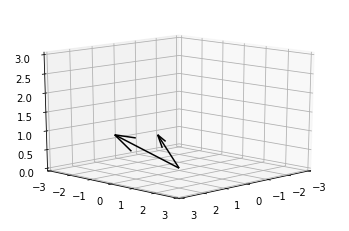

In [93]:
 # We now look at two vectors (2,-1,1) and (1,0,1)

u = np.array([[2, -1, 1],[1,0,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)
print(X,Y,Z)

print(u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'])
#plt.quiver(*origin, -1, -1, 1,color=['red'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])

elev = ((2*np.arcsin(-1/np.sqrt(3)))/np.pi)* 90 
azim = ((2*np.arctan(1))/np.pi) * 90
print(0,azim)
ax.view_init(elev = 15,azim = azim)
plt.draw()

### Column space

We will plot the set of all linear combinations of the two columns of $X$ in the code cell above. We should be getting a plane
of course, but let us do it and see for ourselves. If ${\bf u}_1$ is the vector in the first column of $X$, and ${\bf u}_2$
the vector in the second column of $X$, we will plot all vectors in the set
$$ \bigl\{  w_1 {\bf u}_1 + w_2 {\bf u}_2 : -2 \le w_1 \le 2 \textrm{ and } -2 \le w_2 \le 2 \bigr\}.$$
You can of course plot more points if you wish, but these should give us a pretty good idea.

A couple of points below. If we think of ${\bf u}_1$ and ${\bf u}_2$ as the column vectors, then verify that
$$ X\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}  = \begin{bmatrix} {\bf u}_1 & {\bf u}_2 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = w_1 {\bf u}_1 + w_2 {\bf u}_2. $$
Our implementation will exploit this.

We will plot all the vectors of the set above as a surface. python requires that we arrange each of the x, y and z coordinates
of these points as a matrix, and the use of meshgrid and the particular array sizes below reflect that constraint.

(100, 100)
[[[2.93939394 2.93939394]
  [3.         2.93939394]]

 [[2.93939394 3.        ]
  [3.         3.        ]]]
[[[ 8.81818182 -2.93939394  5.87878788]
  [ 8.93939394 -3.          5.93939394]]

 [[ 8.87878788 -2.93939394  5.93939394]
  [ 9.         -3.          6.        ]]]
54.735610317245346 45.0


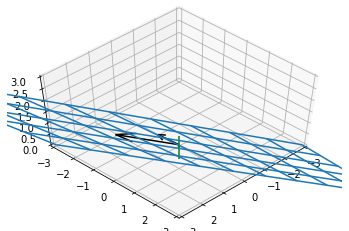

In [95]:
# the following creates a grid of 100*100 
# values in the rectangle with corners (-3,-3)
# (-3,3), (3,3) and (3,-3). The x co-ordinates
# of all the points are assigned to w1 (a 100x100 matrix), the
# y coordinates to w2 (another 100x100 matrix).

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

w1,w2 = np.meshgrid(x,y)

print(w1.shape)
# we are eseentially looking at the linear combination
# of the rows of u for all coefficients -3 \le w1 \le 3
# (obtained by meshgrid above) and -3 \le w2 \le 3.

W = np.stack((w1,w2),axis=2)

ptsonplane = ( W @ u )

print(W[-2:, -2:, :])
print(W[-2:,-2:, :]@ u)

# ptsonplane is a 100x100 stack of 3 co-ordinate vectors. 
# The first, second and third coordinates are the x-, y-
# and z- coordinates respectively of the 100x100 points.

Xp = ptsonplane[:,:,0]
Yp = ptsonplane[:,:,1]
Zp = ptsonplane[:,:,2]

origin = [0],[0],[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Xp, Yp, Zp,rstride=20,cstride=10)
plt.quiver(*origin, X, Y, Z, color=['black','black'])

# We also plot the vector perpendicular to the plane: (1,1,-1) (scaled by -3 for better visualization)
# Note that this plane can be represented by (1,1,-1) dot w = 0.

#plt.quiver(*origin, -3, -3, 3, color=['red'])

# Note that (1,1,-1) dot (-2, 5, 3) =0, so (-2,5,3) must lie on the plane as well. Sure enough it does.

#plt.quiver(*origin, -2/4, 5/4, 3/4, color=['black'])
plt.quiver(*origin, 3,3,3, color=['green'])

#plt.quiver(*origin, 2,2,4, color=['blue'])
ax.set_xlim([-3,3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
# Note from the view at this angle, the three black vectors are on the plane, the red and green are outside the plane.

elev = ((2*np.arcsin(-1/np.sqrt(3)))/np.pi)* 90 
azim = ((2*np.arctan(1))/np.pi) * 90
print(elev+90,azim)
ax.view_init(elev = elev+90,azim = azim)
plt.draw()


### Problem 0

Find the null basis for the matrix
$$ X^T = \begin{bmatrix} 2  & -1 & 1\\ 1& 0 & 1 \end{bmatrix}.$$

Please write code that will take a matrix and output the null basis, rather than just the null basis for the matrix above.

In [1]:
## Submit this

### Checking if a vector is in the column space

Checking if a vector $\bf y$ belongs to a column space of a matrix $X$ is another way to ask if $X{\bf w} = {\bf y}$ has a solutions (where the variables are $\bf w$). Recall from the previous cell that any linear combination of the columns of $X$ corresponds to $X{\bf w}$ for some vector $\bf w$, hence the connection.

Now we have the three vectors (2,-1,1), (1,0,1) and (-2, 5,3), all of which are on the plane (the black vectors). Rotate the picture from the code cell above if you cannot see them properly. We want to see if (5,4,4) (the green vector) can be written as a linear combination of these vectors. Equivalently, we ask if
$$ w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix} + w_3 \begin{bmatrix} -2 \\5\\3\end{bmatrix}$$
can ever equal (5,4,4) for some values of $w_1,w_2,w_3$. Of course, the vector (5,4,4) dot (1, 1, -1) != 0, so (5,4,4) 
does not lie on the plane above. Since any linear combination of the three vectors (2,-1,1), (1,0,1) and (-2, 5,3) can only lie on the blue plane and never ever leave it, we therefore conclude that no matter what values of $w_1,w_2, w_3$ we choose, we will not be able to represent (5,4,4) as the linear combination in the equation above.

Completely equivalent is asking if the following set of equations has a solution:

\begin{align*}
2 w_1 - 1 w_2 - 2 w_3 &= 5 \\
-1 w_1 + 0 w_2 + 5 w_3 &= 4 \\
 1 w_1 + 1 w_2 + 3 w_3 &= 4
\end{align*}

The answer again is no. 
 
If the right side of the last equation were changed to 9, we would have solutions---in fact, infinitely many of them. 

### Problem 1:Explain why in a separate cell below.



### Answer: 


Submit this

### Projection into the column space

Since (5,4,4) does not lie in the linear space $col(X)$ (the blue plane in the pictures above), we look for the closest point in $col(A)$ to it. How?

Let the projection of the vector (5,4,4) onto the blue plane be ${\hat w}_1( 2,-1,1) + {\hat w}_2 (1,0,1)$ (we don't really need the third since any point on the plane is already a linear combination of the first two vectors). 

Now the error (column) vector 
$${\bf e} = \begin{bmatrix}5\\4\\4\end{bmatrix} - \bigl( {\hat w}_1\begin{bmatrix} 2\\-1\\1\end{bmatrix} + {\hat w}_2 \begin{bmatrix}1\\0\\ 1\end{bmatrix} \bigr)$$ 
must be perpendicular to the plane---ie, perpendicular to every point on the plane. How do we ensure that? We know every point on the plane is 
$$w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix}$$
for some two real numbers $w_1$ and $w_2$.
Therefore, if we just ensure that ${\bf e}$ is perpendicular to both (2,-1,1) and (1,0,1), we will then have for an arbitrary vector on the plane:
\begin{align*} 
{\bf e} \cdot &\Biggl( w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix}\Biggr) \\
&= w_1 {\bf e} \cdot \begin{bmatrix} 2\\-1\\1 \end{bmatrix} + w_2 {\bf e} \cdot \begin{bmatrix} 1\\0\\1\end{bmatrix}\\
&= 0 + 0
\end{align*}
where the last equality comes if we ensure ${\bf e}$ is perpendicular to both (2,-1,1) and (1,0,1).

So that is what we do. Recall 
$$X = \begin{bmatrix} 2 & 1 \\ -1 & 0\\ 1 & 1\end{bmatrix} \textrm{ and } {\bf y} = \begin{bmatrix} 5\\4\\4 \end{bmatrix}$$
We look for a vector $\hat {\bf w} = \begin{bmatrix}\hat w_1\\\hat w_2\end{bmatrix}$ such that the error ${\bf y} - X{\hat {\bf w}}$ satisfies
$$ = X^T ( {\bf y} - X{\hat {\bf w}}) = X^T {\bf e} = {\bf 0}. $$
This would then imply
$$(X^T X){\hat {\bf w}} = X^T{\bf y} \textrm{ or } \hat {\bf w} = (X^TX)^{-1} X^T {\bf y}.$$
Note then that the point closest to the plane, $X{\hat {\bf w}}$, is
$$ X\hat {\bf w} = X(X^TX)^{-1} X^T{\bf y}.$$

### Implementing the projection

The following two cells implement the projection operation we obtained in the cells above. The first approach computes the projection using matrix multiplication as noted above. The second uses the module LinearRegression from the scikit-learn package. Needless to say, the computations must match up in an ideal world (and they do in small examples like the above). But numerical errors due to roundoff may creep in large matrix computations, and it is therefore better to use the LinearRegression module which is more optimized than naive multiplication. If you really want it perfect, you should use a multiprecision library with the explicit matrix multiplication.

In [88]:
# Finding the projection of (5,4,4) into the column space of (2,-1,1), (1,0,1) and (-2,5,3)

X= u.T

print(X)
X = np.array([[-2,1,1],[-1,0,1]]).T
y = np.array([-3,-3,3]).reshape(3,1)

from numpy import linalg as lin

hatw = lin.inv(X.T @ X) @ X.T @y

closestpoint = X @ hatw

print('The coefficients we need are ',hatw.T)
print('The closest point to \n', y, '\nin col(X) is \n', closestpoint)

[[ 2  1]
 [-1  0]
 [ 1  1]]
The coefficients we need are  [[-2.  6.]]
The closest point to 
 [[-3]
 [-3]
 [ 3]] 
in col(X) is 
 [[-2.]
 [-2.]
 [ 4.]]


For larger matrices, we prefer to use a better written code (that optimizes the inverse calculations and
also removes redundancies in the matrix X, and cleans it up). For this, we import the linear regression
routine from scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = False)

# We are not fitting an intercept (yet).
reg.fit(X, y)

# To retrieve the coefficients, we use the field coef_ in the object. Note that if you want
# check out all attributes and functions in the object reg, you can do so with dir(reg).
# dir(reg)
print('The coefficients from scikit-learn are ', reg.coef_)

# Sure enough they are the same. 

The coefficients from scikit-learn are  [[-2.33333333  8.        ]]


### Problem  2

In our example, (-2,5,3) doesn't add to the plane already spanned by (2,-1,1) and (1,0,1), but adds redundancy to description of the linear space. Therefore, (2,-1,1), (1,0,1) and (-2,5,3) are NOT linearly independent. Another way of saying this is that there is a linear combination of the three vectors that is equal to ${\bf 0}$---can you find that linear combination? Use the cell below to find it using the the explicit method (ie, functions from numpy.linalg) and using the Linear Regression module sklearn.linear_model.LinearRegression. 

In [1]:
# Submit this

### Problem 3

What if we do want to fit an intercept, ie the target ${\bf y} \sim X{\bf w} + b{\bf 1}$, where b is a real number and ${\bf 1}$ is a vector with every component equal to 1? In the least squares formulation, we want to find ${\bf w}$ and $b$ such
that 

$$ {\hat {\bf w}}, {\hat b} = argmin_{{\bf w},b} || {\bf y} - X{\bf w} -b{\bf 1} ||^2. $$

Turns out this is no big deal. In this problem, we will show that the coefficients we would get for the features when we fit an intercept can be computed as follows: 
 * subtract the mean of all the rows of $X$ from each row (and similarly with $\bf y$), so that each column of the so modified $newX$ and $\bf newy$ sum to zero). 
 * use the centered (modified) matrix and target from the previous step to obtain the coefficients (this time without intercepts)
 
The code below shows how to implement this both as an explicit matrix multiplication and using LinearRegression from scikit-learn. Can you explain why this works in the markdown cell after the code?

In [6]:
Xmean = np.mean(X, axis = 0)
# for the next line, we are leverage broadcasting to ensure that Xmean is subtracted from each row of X.
newX = X- Xmean

ymean = np.mean(y, axis = 0)
# again broadcasting.
newy = y - ymean

newhatw = lin.inv(newX.T @ newX) @ newX.T @y
print('The coefficients when we use Xnew and ynew (no intercept) are ',newhatw.T)

# check with what scikit learn does
reg = LinearRegression(fit_intercept=True).fit(X, y)
print('The coefficients (intercept, but using X and y) from scikit-learn are: ', reg.coef_ )

regtwo = LinearRegression(fit_intercept=False).fit(newX, newy)

print('The coefficients (no intercept, but with newX and newy) from scikit-learn are: ', regtwo.coef_ )


The coefficients when we use Xnew and ynew (no intercept) are  [[ 1. -2.]]
The coefficients (intercept, but using X and y) from scikit-learn are:  [[ 1. -2.]]
The coefficients (no intercept, but with newX and newy) from scikit-learn are:  [[ 1. -2.]]


### Answer


Submit this. This problem is too hard for exams, and perhaps on the difficult side for EE 345. But please give it a shot.

### Problem 4

What would have happened if you fed Xnew and ynew to scikit-learn's regression with the option fit_intercept=True? Try this out and explain what you see. This is the last required problem. There are additional problems below that you can submit for extra credit.


In [ ]:
#Submit this 
# Write code here:


## Real Estate dataset

For the next two modules, we will use something more interesting than the 2x3 matrix we created above. We will use a real estate dataset (which is provided from Kaggle), and use it to train a model that predicts housing values.

In [24]:
import sklearn
import pandas as pd

In [25]:
re = pd.read_csv('./realestate.csv')

In [26]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [28]:
re.head().to_clipboard()
re.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
features = re.columns
print(features)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [12]:
y = re['Y house price of unit area'].to_numpy()

X = re[[x for x in re.columns if x != 'Y house price of unit area' and x != 'No']].to_numpy()

In [13]:
print(X[:5, :])

[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 [2013.5       13.3      561.9845     5.        24.98746  121.54391]
 [2012.833      5.       390.5684     5.        24.97937  121.54245]]


## Module 2: Geometry is not enough

The geometry of linear regression is quite cool, but it also indicates a serious flaw if used uncritically. 

We will first examine one of the pitfalls. A natural way to see how good a linear model is is to use the error vector $\bf e$ (the distance between the target $\bf y$ and its projection $\hat{\bf y}$ into the column space of the data matrix). But this intuition is seriously flawed without further clarifications.

Suppose we add a new column to our measurement matrix $X$ to produce a new measurement matrix $X'$. This new column---our \emph{fake feature}---could simply be a column of randomly generated numbers. Clearly every vector in $col(X)$ is in $col(X')$. So the projection of the target ${\bf y}$ into the $col(X')$ only improves upon (never worse than) its projection into $col(X)$, if our metric t.   

So adding any feature, including randomly generating a fake one (as in the demo below), can only reduce the mean square error on training data. You will find that in the Boston housing dataset, we can drive down the mean square error on training
examples to 0 by adding enough randomly generated features. This sort of "improving" training performance is clearly insane from the perspective of meaningful models.  

So we have to look at the least squares approach more critically. What we really want is that the model we choose is
meaningful in some way. The most common way to phrase this is that the model we pick must \emph{generalize}.  This means that if we find ${\bf w}$ based on measurements $X$ and observations ${\bf y}$ and were subsequently given a new \emph{test} measurement $$\begin{bmatrix}
x_1&\ldots& x_k\end{bmatrix},$$ our prediction $$\begin{bmatrix}
x_1&\ldots& x_k\end{bmatrix} {\bf w}$$ must not deviate too far from the
ground truth on the test example.

Armed with this insight, how should we build a model? If we have a
bunch of measurements $X$, we use the simple expedient of partitioning
the measurements into \emph{training} measurements $X_{train}$ and
\emph{validation} $X_v$ measurements, \ie we partition the rows of $X$
into two disjoint sets.  The targets for measurements
$X_{train}$ are in the vector ${\bf y}_{train}$, and for measurements $X_v$ in ${\bf y}_v$.
validation set. We choose the model ${\bf w}_{train}$ based on only
$X_{train}$ and $y_{train}$, and use the model so obtained to predict the target on
the validation set as $X_v{\bf w}_{train}$. The training error

$$ ||{\bf y}_{train}- X_{train} {\bf w}_{train}||^2$$

measures the fit on the training data, but this is just geometry and the
numerical magnitude does not have much significance. But the validation
error,

$$ ||{\bf y}_v- X_v {\bf w}_{train}||^2$$

is interesting. Ideally, we would like to see the validation and training
errors match up. If one is too far from the other, it is a sign that the
geometry of linear regression is getting fooled, possibly from irrelevant
or misleading features.

The following code cell splits the Boston dataset into training and validation (test) datasets.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_data, test_data, train_values, test_values = train_test_split(X, y, test_size = 0.33, random_state = 5)

print('The number of training examples and the number of features resp. are: ', train_data.shape)
print('The number of test examples and the number of features resp. are: ', test_data.shape)

re_reg = LinearRegression().fit(train_data,train_values)

The number of training examples and the number of features resp. are:  (277, 6)
The number of test examples and the number of features resp. are:  (137, 6)


To check the linear regression model, we predict on the held-out test data as described above.

We will compare with a dummy predictor: the dummy predictor always predicts the mean of the train_targets as an estimate. It is better than nothing of course, but also suspicious since it always predicts the same value regardless of the test example.

In [15]:
pred_values = re_reg.predict(test_data)
mse = np.sqrt( np.mean((pred_values - test_values) ** 2 ) )
print('Loss on test data with linear regression: ', mse) 

trivial_mse = np.sqrt( np.mean( (np.mean(train_values) - test_values)**2 ) )
print('Trivial predictor loss on test data: ', trivial_mse)


Loss on test data with linear regression:  7.575279129528304
Trivial predictor loss on test data:  12.511800406401338


At least we do better than the trivial prediction! But so what? It does not answer how good our predictions are. Is 5.3 a good number or not?

Should we check to see if we can improve our training error? There is a way to do that---we can actually make the training error 0! How do we do this? We have 6 features and 277 examples. We just generate 271 fake features: each feature is a random array of 271 numbers. 

In [16]:
from numpy.random import randn

fakefeatures = randn(277,277-6)
newtrain = np.hstack((train_data,fakefeatures))


Now let us run linear regression on this new data---what should we see for the new mse?

In [17]:
newreg = LinearRegression().fit(newtrain,train_values)

newpred = newreg.predict(newtrain)

newmse = np.mean((newpred - train_values) ** 2 ) 
print(np.round(newmse,10))


0.0


It is 0! Can you explain why this happened?

But even though the training error can be made 0, it doesn't mean this model is better. We added 271 fake features, which probably overwhelm any real correlation that existed. Let us predict with this model. The test data has only 6 features of course, so we just apply the coefficients on the real features to the test data (to make multiplication possible by a 271 length vector, we just append zeros wherever the fake coefficients multiply).

In [19]:
newtest = np.hstack((test_data, np.zeros([137,277-6])))

newtestpred = newreg.predict(newtest)
newtestsse = np.sqrt( np.mean( (newtestpred - test_values )**2 ) )

print('Test error in model swamped by fake features: ',newtestsse)


Test error in model swamped by fake features:  14.579860126321371


It is way way worse than even the trivial algorithm. Which is the great moral of machine learning: Don't try too hard! It is better to use a simple model even if imperfect, than use a complicated one to fit the training data exactly. This phenomenon is often refered to as overfitting.

## Module 3: Significance of features and LASSO

In the example above, the problem was that we used too many features that were not real, or "not significant". But how do we know which features are significant and which are not? Well, classical statistics has a way of estimating the significance of features, using the notion of t-values. You will learn this in the last section, but this approach works when we have a few features we doubt. Not when most of the features are suspect, as in the example above and in problems that involve gene expression data and other biologically motivated problems.

So now, let us focus on this problem: if we are presented with the set of 277 features (271 of which are fake) and we do not know which were real and which wasn't. Could we even recover the real ones? How?

The story is the same: we try fitting as simple a model as possible on the newtrain dataset. If we want to select features, we want to impose a notion of "simplicity" as follows: obtain a least squares fit using as few non-zero coefficients as possible. This is a constrained optimization problem, which we can pose by means of its Lagrangian as we discuss on the board.

But this way of posing the problem is NP-hard (just like asking for the minimum number of errors was NP-hard when we were confronted with data that was not linearly separable). We relax the problem, and instead ask to constrain the sum of absolute values of the coeffients (instead of number of non-zero coefficients). This is called the LASSO formulation.

This actually works, and quite well! LASSO will return very few non-zero coefficients, and we can actually prove that in many cases, the solution would match teh NP-hard formulation (not always though). Besides, it is quite easy to solve via gradient descent methods (not even stochastic gradient descent). Let us do this:

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler(copy=True, with_mean=False)
newtrainstd = scaler.fit_transform(newtrain)
lasso = Lasso(alpha = .12*np.sqrt(277)).fit(newtrainstd,train_values)
print(lasso.sparse_coef_)

  (0, 1)	-1.1414868153868696
  (0, 2)	-5.339905231399286
  (0, 3)	1.7061840034493414
  (0, 4)	1.6305886847175248


You should have got the features 1,2,3,4, all of which are real. This also means that the rest of the included features may not have been that informative to begin with. Almost miraculously, LASSO chose none/very few of the 271 fake features. Your mileage will vary depending on the random matrices chosen when making the fake features.

If you got some fake features, vary the value of alpha and you will very likely find a value of alpha where only real features are chosen. In practice, we don't vary the regularization level manually, rather manage the level via cross validation).

The parameter alpha controls how much regularization is performed---it effectively sets an upper bound on the sum of absolute values of weights that is acceptable. Changing alpha changes the upper bound. alpha = 0 means the upper bound on the $\ell_1$ norm is infinity (any weights are acceptable, so this is like using the LinearRegression object). Increasing alpha tightens the upper bound, greater the alpha, more the weights are constrained. If you set alpha very high, you will find all coefficients are 0 (lasso.sparse_coef_ is now empty) because the restriction on the weights is too great to admit any feature.

Note: in class we used a dual regularization approach, which was to use $C$ as an upper bound on the $\ell_1$ norm. $C$ is inversely related to $\alpha$ used in the code above. Both are completely equivalent.

In [36]:
selected_features = [1,2,3,4]
selected_feature_names = [features[i] for i in selected_features]

print(selected_feature_names)

['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']


There is a beautiful story why LASSO works so well and this starts from convex geometry in high dimensions. In high dimensions, almost all the volume of a sphere is in a thin shell near the surface, and all the volume of a octagon is near its pointy edges. This is why LASSO chooses solutions that are sparse. 

Not the greatest explanation, but you have to wait till EE645 to learn more. But for now, understand that LASSO is your "lie detector". These approaches are called "regularizers", and we will use the LASSO regularizer in neural network training as well. It is another potent ingredient in our recipes.


## Module 4: Significance: the Classical Statistics Perspective

In the above example, we introduced fake features and watched the model performance tank spectacularly. But it isn't as artificial as it seems. Even in the 6 original features given to us in the Real Estate dataset, how do we know if one or more of the features is "fake" or irrelevant? Just because someone measured it does not mean it is going to be useful for prediction!

Classical statistics approaches this with what are known as $t-$values. We will first run the module _Ordinary_ _Least_ _Squares_ (OLS for short) from the statsmodel api. This is like the sklearn LinearRegression object, but it gives us a lot of classical significance information that the LinearRegression object from sklearn does not.

In [37]:
import statsmodels.api as sm

train_data_centered = sm.add_constant(train_data)
tvalOLS = sm.OLS(train_values, train_data_centered).fit()

print(tvalOLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     56.89
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.60e-45
Time:                        16:14:36   Log-Likelihood:                -1013.0
No. Observations:                 277   AIC:                             2040.
Df Residuals:                     270   BIC:                             2065.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6704.4207   8754.822     -0.766      0.4

1 In particular, note Warning [2]: that columns may be linearly correlated. 

2 Next, look at the column P(> |t|), and note first that features 1, 2, 3, and 4 (x1, x2, x3, x4) returned by LASSO all have values <= .01. We say "they are significant at the .01 level". This means that the chance that they are correlated with the output *purely by chance* is small, and is less than the number in the P(>|t|) column.

3 There are other features---namely, x5 that may also be significant in the classical view. LASSO disagreed, and is more likely to be correct in practice.

#### Hypothesis testing framework

We will understand what the t-values mean. In the above Real Estate training data, there are 7 features (the constant intercept, and 6 given features). In the table above, the t-value associated with feature i is the incremental utility of the i'th feature. Meaning, if we already had all features other than the i'th feature (namely 1 through i-1 and i+1 to 14), what is the utility of adding feature i over and above the remaining 13? 

To understand this, we pose a hypothesis test that compares the two scenarios:

$H_0:$: the target $y$ is not really predicted by the $i$'th feature, ie, the value $w_i$ we obtain is purely because of Gaussian noise. 

$H_1:$: the value of $w_i$ we get is meaningful.

Let us visualize the geometry of this hypothesis test using the examples below. In the following cells, the code (which you can largely ignore) comes first followed by the explanation (since it is easier to read the explanation right next to the picture rather than reading and then scrolling down). Since we can only see 3 dimensions, the visualizations are necessarily caricatures.

[[-6]
 [ 6]]


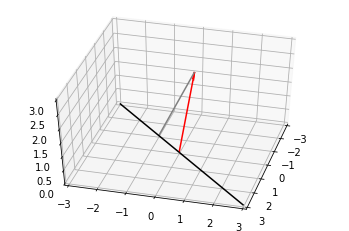

In [28]:
 # We now look at two vectors (2,-1,1) and (1,0,1)
target = np.array([-2,0,2])

u = np.array([[3,3,0],[-3,-3,0]])
# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)

print(u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'],arrow_length_ratio=0)
plt.quiver(*origin, target[0],target[1],target[2], color = ['red'],arrow_length_ratio=.1)
plt.quiver(target[0],target[1],target[2],1,-1,-2, color = ['gray'],arrow_length_ratio=0)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(45,15)



Refer to the picture above. The origin is where the red line meets the black line.

The x-y plane in the picture drawn below will stand for the space formed by all 7 features. The line in the x-y plane in the picture below stands for the space formed by all but the $i$'th feature (so the line "represents" a 6-d linear space). The red vector is the target ($y$), and the gray line joins the target to its projection on to the line. 


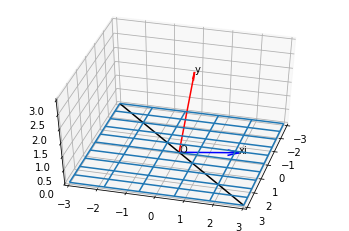

In [29]:
xi = np.array([-.5, 2, 0])
target = np.array([-2,0,2])

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'],arrow_length_ratio=0)
plt.quiver(*origin, target[0],target[1],target[2], color = ['red'],arrow_length_ratio=.1)
plt.quiver(*origin, xi[0],xi[1],xi[2],color=['blue'],arrow_length_ratio=.2)
ax.text(0,0,0, 'O')
ax.text(-.5,2,0, 'xi')
ax.text(-2,0,2,'y')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])

ax.view_init(45,15)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
w1,w2 = np.meshgrid(x,y)
plane = np.zeros(w1.shape)
ax.plot_wireframe(w1, w2, plane,rstride=20,cstride=10)


Now we add the $i$'th feature. The space of all 7 features is the x-y plane. The space of 6 features, all except the $i'$th feature is the black line.

* In the picture above, the origin is where the red, blue and black lines intersect. 

* The red vector is the target (y) 

* The blue vector is the i'th feature. 

* The black line stands for the linear space spanned by all features except the i'th one. 

* The linear space of all features including the i'th feature is therefore the x-y plane (denoted by the grid above). \

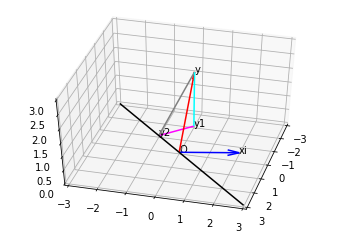

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'],arrow_length_ratio=0)
plt.quiver(*origin, target[0],target[1],target[2], color = ['red'],arrow_length_ratio=.1)
plt.quiver(*origin, xi[0],xi[1],xi[2],color=['blue'],arrow_length_ratio=.2)
plt.quiver(target[0],target[1],target[2],1,-1,-2, color = ['gray'],arrow_length_ratio=0)
plt.quiver(target[0],target[1],target[2],0,0,-2, color = ['cyan'],arrow_length_ratio=0)
plt.quiver(-1,-1,0,-1,1,0, color=['magenta'],arrow_length_ratio =0)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.text(0,0,0, 'O')
ax.text(-.5,2,0, 'xi')
ax.text(-2,0,2,'y')
ax.text(-2,0,0,'y1')
ax.text(-1,-1,0,'y2')

ax.view_init(45,15)
#ax.view_init(90,45)


Refer to the picture above. The origin $O$ is where the red, blue and black lines intersect.

* _Regression onto 6 features (all but feature $i$)_ The gray line in the picture above connects the projection of the target 𝐲 to the smaller linear space (the line "represents" the linear space spanned by all 6 features _excluding_ feature i). It meets the smaller linear space (black line) at $y_2$.

* _Regression onto all 7 features_ The light blue (cyan) line is the projection of the target into the larger linear space (the plane "represents" the linear space spanned by all 7 features, including feature i marked in blue). It meets the larger linear space (the x-y plane) at $y_1$

The pink line connects $y1$ and $y2$, ie the projection onto the line (6-d space) and the projection of the target into the plane (7-d space). 

Here is the key insight: the projection of $y_1$ onto the black line is actually $y_2$. Put another way, we could get $y_2$ in two steps: first project $y$ into the 7-d space of all features to get $y_1$, and then project $y_1$ (rather than $y$) onto the 6-d space. The following problem proves it.


### Problem 5 (Optional)
The pink line connects the two points $y_1$ and $y_2$. Show that this line will automatically be perpendicular to the black linear space (the space spanned by the 6 features excluding feature $i$). That is the angle $y_1y_2O$ is a right angle. Implying, therefore, that the projection of $\bf y$ on to the black line is the projection of (the *projection of $\bf y$ onto the plane*). 


### Analysis

Now we assume that the noise is Gaussian under the null hypothesis. Namely, under $H_0$, the null hypothesis, we assume that example $k$ as
 $$ y_k = \sum_{j=1\\j\ne i}^{7} w_j x_{kj} + \nu_k, $$
where $\nu_k \sim $ Gaussian with mean 0 and variance $\sigma^2$ for an unknown $\sigma$. Therefore the vector $\bf y$ is a vector with all components Gaussian. Note that $w_j$ are some coefficients (unobserved by us), not necessarily the $\hat{w}_j$ that we calculate via linear regression. In other words, we do not assume that $\sum_{j=1\\j\ne i}^{7} w_j x_{kj} = y2$. But whatever this point $\sum_{j=1\\j\ne i}^{7} w_j x_{kj}$ on the black line is, we treat it as fixed, and call it ${\bf s}$. Therefore, we can write under the null hypothesis:

$$ {\bf y} = {\bf s} +{\bf n}, $$

where $$\bf n = \begin{bmatrix} \nu_1 \\ \vdots \\ \nu_n\end{bmatrix}$$. 

We assume that noise is statistically independent from example to example. Restating our hypothesis again:

$H_0:$: the target $y$ is not really predicted by the $i$'th feature, ie, the value $w_i$ we obtain is purely because of Gaussian noise. 

$H_1:$: the value of $w_i$ we get is meaningful.

We can rephrase the null hypothesis now as follows: there is no meaningful component of the description of $y$ perpendicular to the black line, so any $w_i$ we observe is purely due to noise. In particular, the pink, gray and light blue lines must all solely be due to noise. 


We know the square of the length of the light blue line---it is simple the mean square error of linear regression into all 7 features. This blue line is perpendicular to 7 features, therefore if there are n examples, it lives in a n-7 dimensional space. 

1. The pink line is interesting, it is a vector whose direction is the i'th row of $(X^T X)^{-1} X^T$. 

### Problem 6 (optional)
Prove that the line joining $y1$ and $y2$ is parallel to the $i'$th row of $(X^T X)^{-1} X^T$. Hint: to prove this, it is enough to show that (i) the $i'$th row of $(X^T X)^{-1} X^T$ is perpendicular to all columns of $X$ except the $i'$th column (ie the black line in the caricature above) (ii) and the $i'$th row of $(X^T X)^{-1} X^T$ is in the column space of $X$ (ie in the xy-plane in the caricature above). Call this row ${\bf p}_i$.

### Problem 7 (optional)
Show that ${\bf p}_i^T {\bf p}_j$ is the $(i,j)'$th element of $(X^TX)^{-1}$


In [41]:
# Verify the problem statement first. Recall taht the train data in the real estate set is train_data
# We will verify that the third row of $(X^T X)^{-1} X^T$ is orthogonal to the linear space formed by all features except the third feature
from numpy import linalg as lin

X = train_data
p3 = (lin.inv(X.T @ X) @ X.T )[2,:]

# Note that p3 is now orthogonal to all columns of X except the third.
print(np.round(X.T @p3,2))

[-0.  0.  1. -0. -0.  0.]


This section requires an understanding of probability. But many of you are perfectly capable of handling this with my help--- please see me to go over this.

### Gaussian Properties

Two minor miracles of Gaussianity come into play here:

a. Any linear combination of a bunch of independent Gaussians is a Gaussian random variable itself. Namely any vector times $\bf y$ is Gaussian. So the projection of ${\bf y}$ into any direction is a Gaussian random variable.  

b. projections of a vector of independent Gaussians into orthogonal spaces are statistically independent.  

Therefore, the projection of the noise onto the light-blue and the pink lines are (a) Gaussians and (b) statistically independent. 
From the formula for linear regression ${\bf w} = (X^TX)^{-1} X^T y$ that the coefficient of feature $i$ is simply 

$$w_i = {\bf p}_i^T{\bf y}.$$ 

####  Statistics of $w_i$ under null hypothesis

From minor miracle (a), we know $w_i$ is Gaussian. Now we do not expect any component of the signal in this direction and the noise $\nu$ had expectation 0--so $w_i$ is Gaussian with expectation 0. We will now find out the variance of $w_i$.

The variance of $w_i$ is $E w_i^2 $ since $w_i$ has 0 mean. Therefore, the expectation of $w_i^2$, which we write for fun as $w_i w_i^T$ ($w_i$ is just a number, its transponse is the same number---but humor me here) is 

$$ {\mathbb E} w_i w_i^T = {\mathbb E} {\bf p}_i^T {\bf y} {\bf y}^T { \bf p }_i = {\bf p}_i^T ( {\mathbb E} ({\bf y}-{\bf s})({\bf y}^T -{\bf s}^T)){\bf p}_i = {\bf p}_i^T ( {\mathbb E} ({\bf n}{\bf n}^T){\bf p}_i = \sigma^2 {\bf p}_i^T {\bf p}_i \tag*{(2)}$$

where the second equality follows since the signal $\bf s$ is perpendicular to ${\bf p}_i$ and hence subtracting this signal will not change the expectation, and the last equality follows because we assume iid Gaussian noise under the null hypothesis.

From Problem 7 above, ${\bf p}_i^T {\bf p}_i$ is just the $(i,i)'$th entry in $(X^TX)^{-1}$, $\alpha_{ii}$. Plugging this into equation (2), we have that the variance of $w_i$ is

$$ \textrm{var}(w_i) = {\mathbb E} w_i^2 -0 = \sigma^2 {\bf p}_i^T {\bf p}_i = \sigma^2 \alpha_{ii}, \tag*{(3)}$$

and recall that $\alpha_{ii}$ is simply the $i'$th diagonal element of $(X^TX)^{-1}$.




#### Estimating $\sigma^2$ 
Now, we don't know $\sigma^2$. But we want to estimate it, and we want our estimate to be independent of $w_i$. Here we use minor miracle b. The pink line was in the direction of ${\bf p}_i$, and therefore $w_i = {\bf p}_i^T \bf y$ was the component of the noise along the pink line. 

Therefore the error in the 7 dimension regression, the light blue line, is orthogonal---and this error is a Gaussian vector independent of $w_i$! Nice how things work out. The magnitude square of the error is known as a chi-squared random variable with $n-7$ degrees of freedom (it is orthogonal to 7 dimensions, so if we had $n$ training examples, it lives in a $n-7$ dimensional space). The magnitude squared of the error vector has expectation $\sigma^2(n-7)$ by properties of the chi-squared random variable.

Putting it all together, we can estimate $\sigma^2$ using
$$ \hat\sigma^2 = \frac{||\text{error}||^2}{n-7}, $$
and therefore our estimate of the variance of $w_i$ is now from Equation (3),

$$ \textrm{var}(w_i) = \frac{|| \text{error} ||^2\alpha_{ii}}{n-7}.$$

8. The quantity 

$$\frac{ w_i }{\sqrt{\textrm{var}(w_i)}} \tag*{(4)} $$

is distributed according to the Student-t distribution (or simply t-distribution) with the number of degrees of freedom equal to $n-7$. The cummulative distribution is well tabulated in python/R/any other software, and is plotted below. For large degrees of freedom, this is approximately Gaussian-looking.



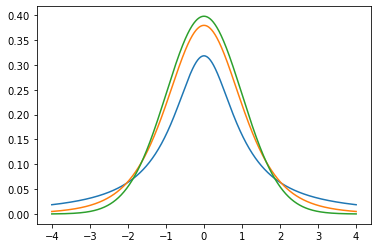

In [60]:
from scipy import stats
x = np.linspace(-4,4,1000)
tvalsdf1 = stats.t.pdf(x,1)
tvalsdf5 = stats.t.pdf(x,5)
tvalsdf100 = stats.t.pdf(x,100)

fig = plt.figure()
plt.plot(x,tvalsdf1)
plt.plot(x,tvalsdf5)
plt.plot(x,tvalsdf100)


If the value of $w_i$ we observed was purely by chance (null hypothesis), then the quantity in Equation (4) would be t-distributed with $n-7$ degrees of freedom. We observed a value, say -10, for the coefficient. We can therefore figure out the probability that purely by chance, we could see a value whose absolute value is as big as 2---this is the area of the shaded (in red) portion in the figure below. This probability is what you see in the heading P( > |t|).

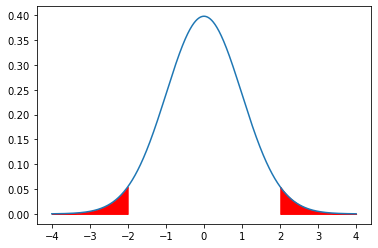

In [32]:
from scipy import stats
x = np.linspace(-4,4,1000)
tvalsdf100 = stats.t.pdf(x,100)

fig = plt.figure()
ax = plt.axes()
plt.plot(x,tvalsdf100)

ax.fill_between(x,tvalsdf100, where=(x<-2),color='red')

ax.fill_between(x,tvalsdf100, where=(x>2),color='red')

Let us see if all this makes sense. Here is the statsmodel generated t-values again:

In [33]:
import statsmodels.api as sm

train_data_centered = sm.add_constant(train_data)
tvalOLS = sm.OLS(train_values, train_data_centered).fit()

print(tvalOLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     56.89
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           3.60e-45
Time:                        22:28:32   Log-Likelihood:                -1013.0
No. Observations:                 277   AIC:                             2040.
Df Residuals:                     270   BIC:                             2065.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6704.4207   8754.822     -0.766      0.4

And here is what we compute using the reasoning above (a very small amount of code for a lot of reasoning!)

In [34]:
n,m = train_data.shape

X = np.hstack((np.ones([n,1]),train_data))
y = train_values
reg = LinearRegression(fit_intercept=False).fit(X,y)

error = reg.predict(X)-y

sse = np.dot(error,error)
alphaii = lin.inv( X.T @ X).diagonal()
varmatrix = sse * alphaii / (n-7)
stderr = np.sqrt(varmatrix)
tvals = reg.coef_/ stderr
pvals =[ 2*(1-stats.t.cdf(np.abs(x),(n-7))) for x in tvals]

table = pd.DataFrame()
table['coef'],table['stderr'], table['t-values'], table['P(>|t|)'] = [np.round(reg.coef_,4),np.round(stderr,3),np.round(tvals,3),np.round(pvals,3)]

print(table)

        coef    stderr  t-values  P(>|t|)
0 -6704.4207  8754.822    -0.766    0.444
1     5.3049     2.036     2.606    0.010
2    -0.2876     0.050    -5.697    0.000
3    -0.0055     0.001    -5.729    0.000
4     0.9552     0.255     3.752    0.000
5   213.3055    57.120     3.734    0.000
6   -76.1583    64.271    -1.185    0.237


Of course, all the above are perfect matches! You get linear regression perfectly when you understand how we generated the table below.